In [25]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

#Plot Setting
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

### Data Preprocessing

In [26]:
file_path = "data/*.log"

all_files = glob.glob(file_path)

dfs = [pd.read_csv(file, delimiter= "\t", header=None) for file in all_files]

df = pd.DataFrame()
for i, temp_df in enumerate(dfs):
    temp_df["set"] = i
    df = pd.concat([df, temp_df])
    
df.columns = [
    "chest_acc_x", 
    "chest_acc_y", 
    "chest_acc_z", 
    "ecg_1", 
    "ecg_2", 
    "ankle_acc_x", 
    "ankle_acc_y", 
    "ankle_acc_z", 
    "ankle_gyr_x", 
    "ankle_gyr_y", 
    "ankle_gyr_z", 
    "ankle_mag_x", 
    "ankle_mag_y", 
    "ankle_mag_z", 
    "arm_acc_x", 
    "arm_acc_y", 
    "arm_acc_z", 
    "arm_gyr_x", 
    "arm_gyr_y", 
    "arm_gyr_z", 
    "arm_mag_x", 
    "arm_mag_y", 
    "arm_mag_z",
    "activity",
    "set" 
]

df

chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  \
0           -9.5409      -1.2392    -0.774680 -0.083726 -0.054422   
1           -9.5641      -1.5915    -0.922180 -0.154890 -0.121400   
2           -9.5849      -1.5612    -0.940510 -0.251180 -0.175820   
3           -9.7097      -1.3823    -0.777030 -0.263740 -0.184200   
4           -9.7578      -1.5030    -0.872110 -0.385140 -0.246990   
...             ...          ...          ...       ...       ...   
135163     -12.2440      -2.9706    -0.035772  0.812140  1.096800   
135164     -10.9220      -3.4190    -0.339280  1.469400  1.285200   
135165      -9.4842      -3.0643    -1.033700  0.238620  0.891680   
135166      -8.7889      -2.4757    -0.612290 -0.205130  0.460490   
135167      -8.6851      -1.0985     0.153770  0.318160  0.908420   

        ankle_acc_x  ankle_acc_y  ankle_acc_z  ankle_gyr_x  ankle_gyr_y  ...  \
0           2.34480      -9.6597      1.35300     0.781080     -0.52158  ...   
1           2.08880      -9.4906      1.43180     0.779220     -0.52533  ...   
2           2.13860      -9.4919      1.30720     0.779220     -0.52533  ...   
3           2.21270      -9.6292      1.43650     0.779220     -0.52533  ...   
4           2.21950      -9.6426      1.08170     0.779220     -0.52533  ...   
...             ...          ...          ...          ...          ...  ...   
135163      0.57061      -2.5602      0.41936    -0.055659      0.64165  ...   
135164      5.26840      -4.9331      9.66020    -0.055659      0.64165  ...   
135165      0.53805      -5.9706      2.93600    -0.055659      0.64165  ...   
135166      1.56950      -7.9809     -2.05000    -0.085343      0.43715  ...   
135167      3.43700     -10.8690      2.22010    -0.085343      0.43715  ...   

        arm_acc_y  arm_acc_z  arm_gyr_x  arm_gyr_y  arm_gyr_z  arm_mag_x  \
0         -6.6875     2.2490   -0.64902   -0.13758    0.82328    -1.6286   
1         -6.5352     2.4753   -0.64902   -0.13758    0.82328    -1.2749   
2         -6.6865     2.3532   -0.64902   -0.13758    0.82328    -1.4563   
3         -6.4962     2.3835   -0.63922   -0.14579    0.83621    -1.4509   
4         -6.4775     2.2490   -0.63922   -0.14579    0.83621    -1.0881   
...           ...        ...        ...        ...        ...        ...   
135163   -16.9660     2.3704    0.10980   -0.99384    0.19181    -6.1287   
135164   -13.3900     2.9972    0.10980   -0.99384    0.19181   -10.2420   
135165   -11.3790     3.1498    0.10980   -0.99384    0.19181   -12.9440   
135166   -10.0000     3.0000    0.11961   -0.97331    0.15302   -14.5240   
135167    -8.9374     3.2615    0.11961   -0.97331    0.15302   -14.1620   

        arm_mag_y  arm_mag_z  activity  set  
0         -1.2796    -2.5469         0    0  
1         -1.8203    -1.8124         0    0  
2         -1.9999    -1.8142         0    0  
3         -1.4592    -2.1805         0    0  
4         -1.0890    -1.0939         0    0  
...           ...        ...       ...  ...  
135163    15.4950    18.8560         0    9  
135164    17.1390    33.9200         0    9  
135165    16.1700    43.2620         0    9  
135166     1.8494    43.3730         0    9  
135167   -15.8330    35.9760         0    9  

[1215745 rows x 25 columns]

In [27]:
df.loc[df["activity"] == 1]["activity"]

35328    1
35329    1
35330    1
35331    1
35332    1
        ..
15355    1
15356    1
15357    1
15358    1
15359    1
Name: activity, Length: 30720, dtype: int64

In [28]:
activities = [np.nan, "standing", "sitting", "lying down", "walking", "climbing", "waist bends forward", "frontal elevation of arms", "knee bending",
              "cycling", "jogging", "running", "jump front & back"]

df["activity"] = df["activity"].astype(object)

for i, activity in enumerate(activities):
    df.loc[df["activity"] == i, "activity"] = activity
    
df = df.dropna()

In [29]:
df["activity"].unique()

array(['climbing', 'standing', 'sitting', 'lying down', 'walking',
       'waist bends forward', 'frontal elevation of arms', 'knee bending',
       'cycling', 'jogging', 'running', 'jump front & back'], dtype=object)

### Exploratory Data Analysis (EDA)

In [30]:
# Only data set 0
df_0 = df[df["set"] == 0]

category = ["Chest Acceleration", "Electrocardiogram Signal", "Ankle Acceleration", "Ankle Gyroscope", "Ankle Magnetometer", "Arm Acceleration", "Arm Gyroscope", "Arm Magnetometer"]
chest_acc_set = df.columns[0:3]
ecg_set = df.columns[3:5]
ankle_acc_set = df.columns[5:8]
ankle_gyr_set = df.columns[8:11]
ankle_mag_set = df.columns[11:14]
arm_acc_set = df.columns[14:17]
arm_gyr_set = df.columns[17:20]
arm_mag_set = df.columns[20:23]

category_dict = {
    "Chest Acceleration": chest_acc_set,
    "Electrocardiogram Signal": ecg_set,
    "Ankle Acceleration": ankle_acc_set,
    "Ankle Gyroscope": ankle_gyr_set,
    "Ankle Magnetometer": ankle_mag_set,
    "Arm Acceleration": arm_acc_set,
    "Arm Gyroscope": arm_gyr_set,
    "Arm Magnetometer": arm_mag_set
}

#Create a function for plotting
def activity_plot(cat):
    if cat not in category_dict:
        print(f"{cat} is not a valid category.")
        return
    
    # Subset the data columns for the specified category
    data_set = category_dict[cat]
    
    # Create a new figure for the category
    plt.figure(figsize=(20, 10))
    plt.suptitle(cat, fontsize=30)
    
    # Iterate through the activities and plot each one in a subplot
    for i in range(12):
        # Filter the dataset for the current activity
        df_temp = df_0[df_0["activity"] == activities[i + 1]]
        
        # Create subplot for each activity
        plt.subplot(4, 3, i + 1)
        plt.title(activities[i + 1], fontsize=15)
        
        # Plot each column in the data_set for the specified category
        for c in data_set:
            plt.scatter(df_temp.index, df_temp[c], label=c, s=3, alpha=0.5)
        
        plt.legend(loc="upper left", fontsize=10)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    plt.show()
        

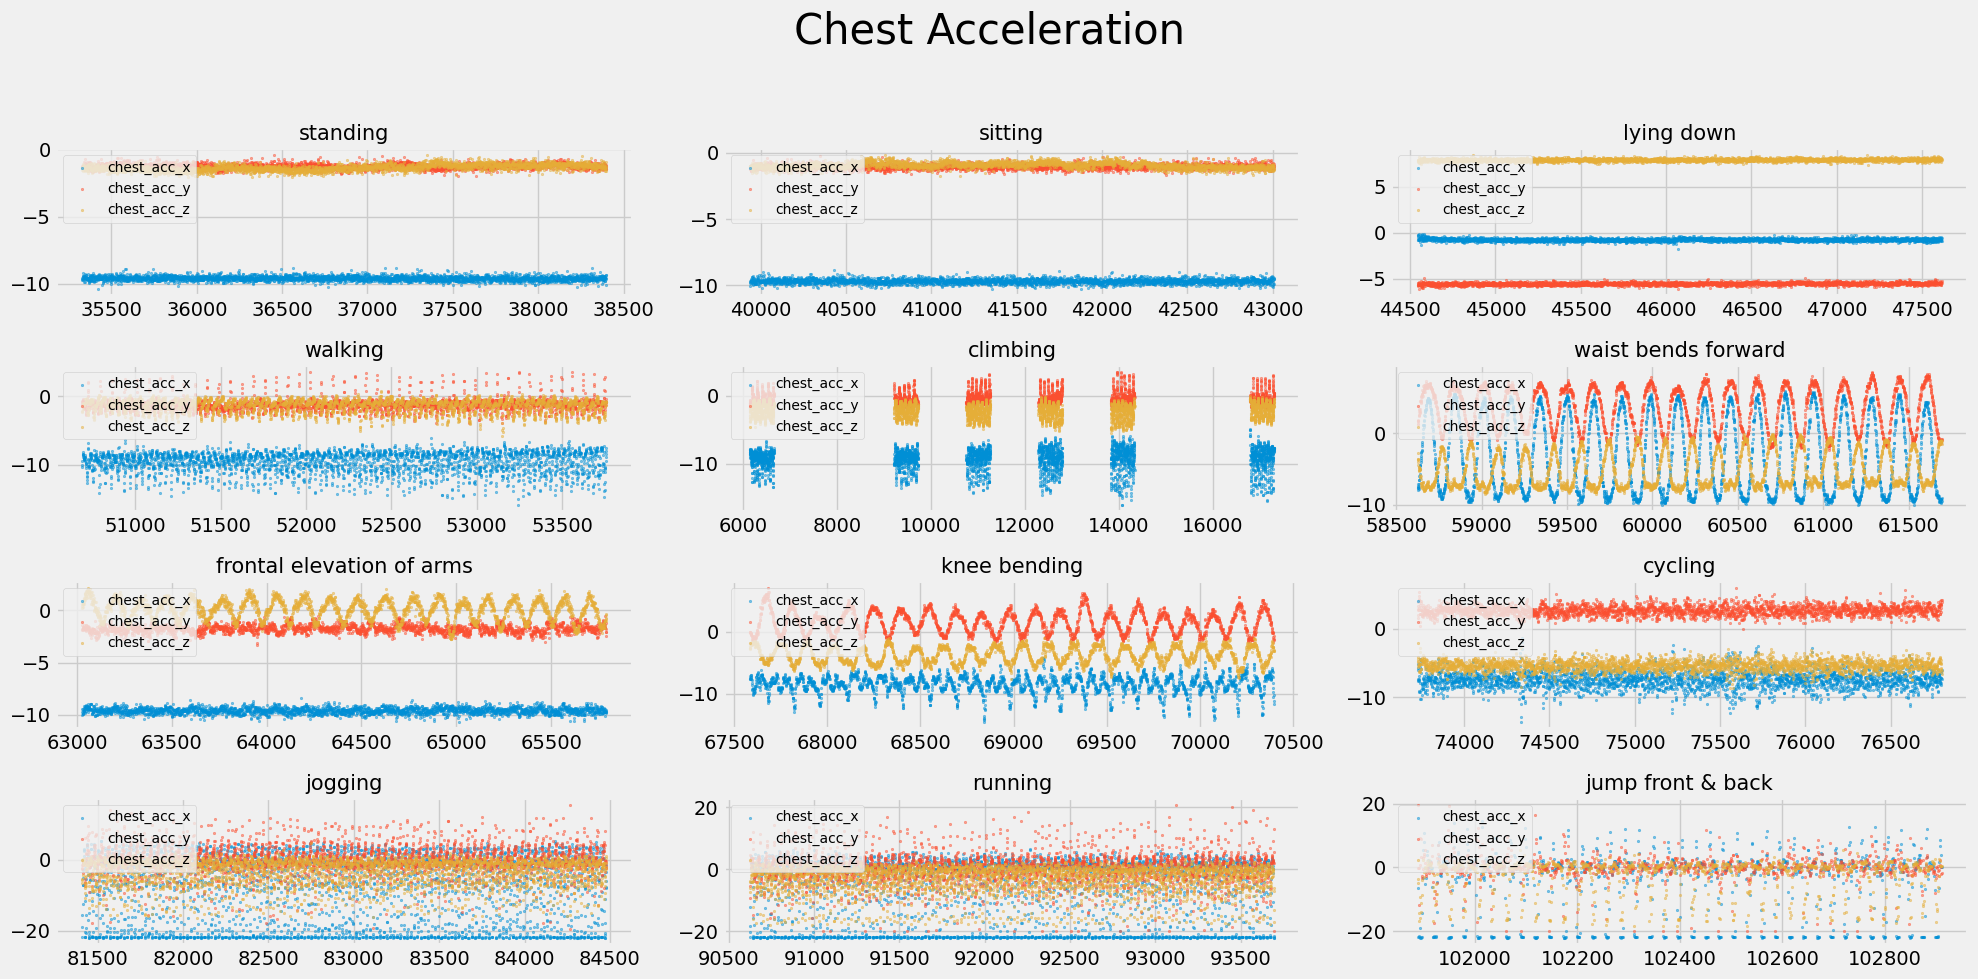

In [31]:
activity_plot("Chest Acceleration")

For the Chest Acceleration category, we could check the following.

- Standing, Sitting, Lying Down: Minimal fluctuation; stable baseline due to low movement.
- Walking, Jogging: Periodic patterns; jogging shows higher frequency and amplitude.
- Climbing: Intermittent bursts, indicating steps with peak accelerations.
- Frontal Arm Elevation, Waist Bends: Oscillatory patterns; repetitive motion with z-axis activity.
- Knee Bending: Rhythmic peaks reflecting controlled, repetitive movement.
- Cycling: Stable with slight oscillations, indicating consistent pedaling.
- Running: High-frequency, large-amplitude oscillations due to intense movement.
- Jumping: Sharp spikes, showing impact from vigorous movement.

Not only for the Chest Acceleration, the analysis can be done by every category.

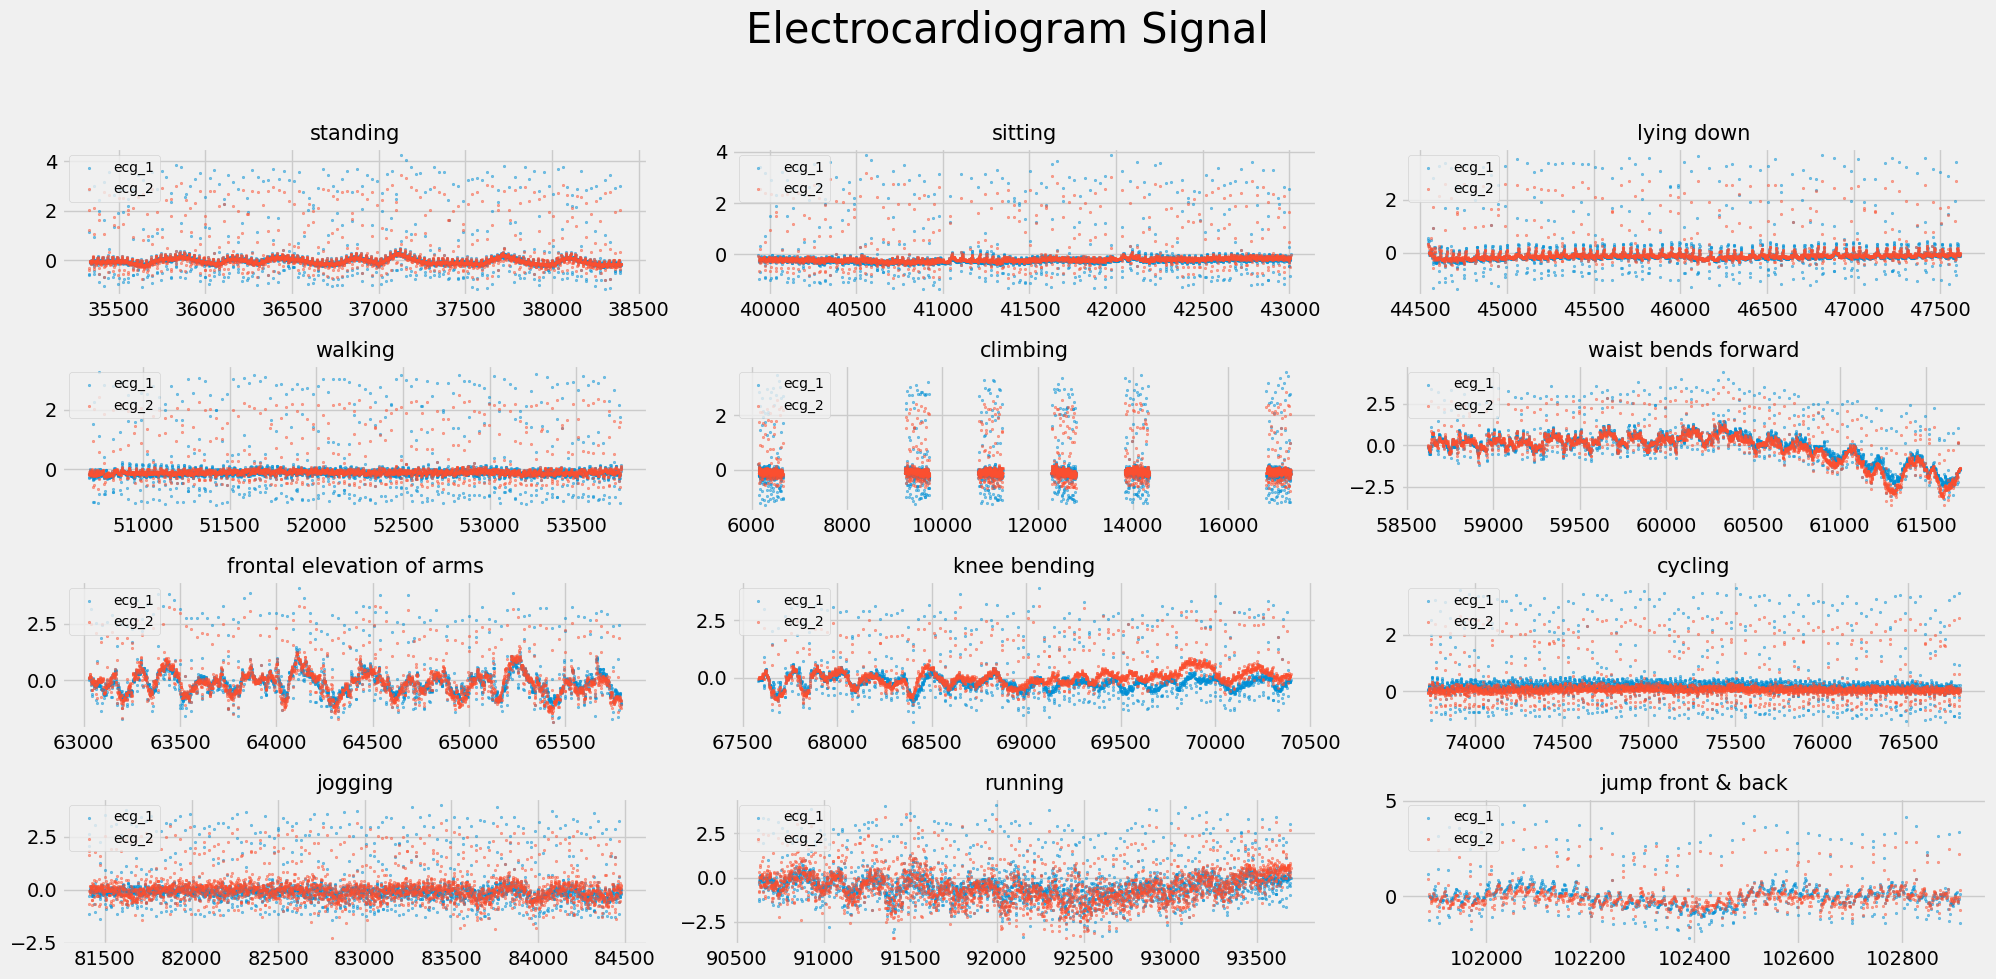

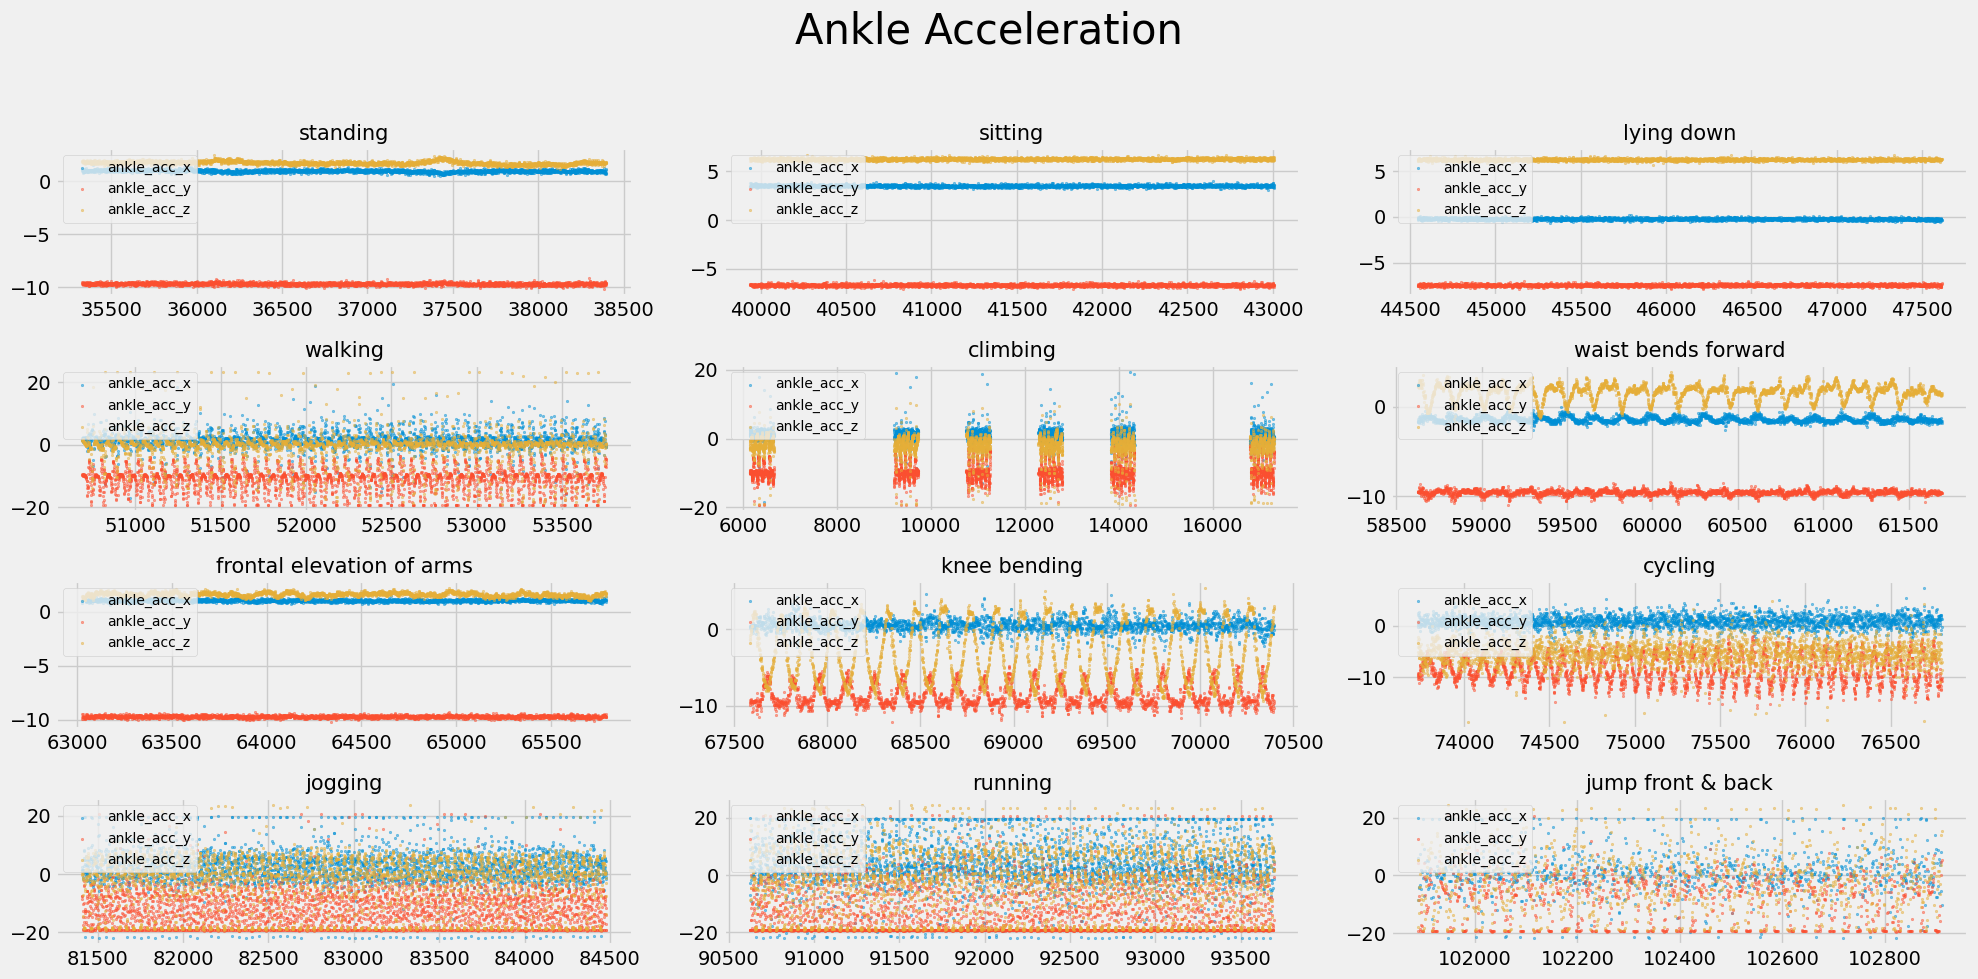

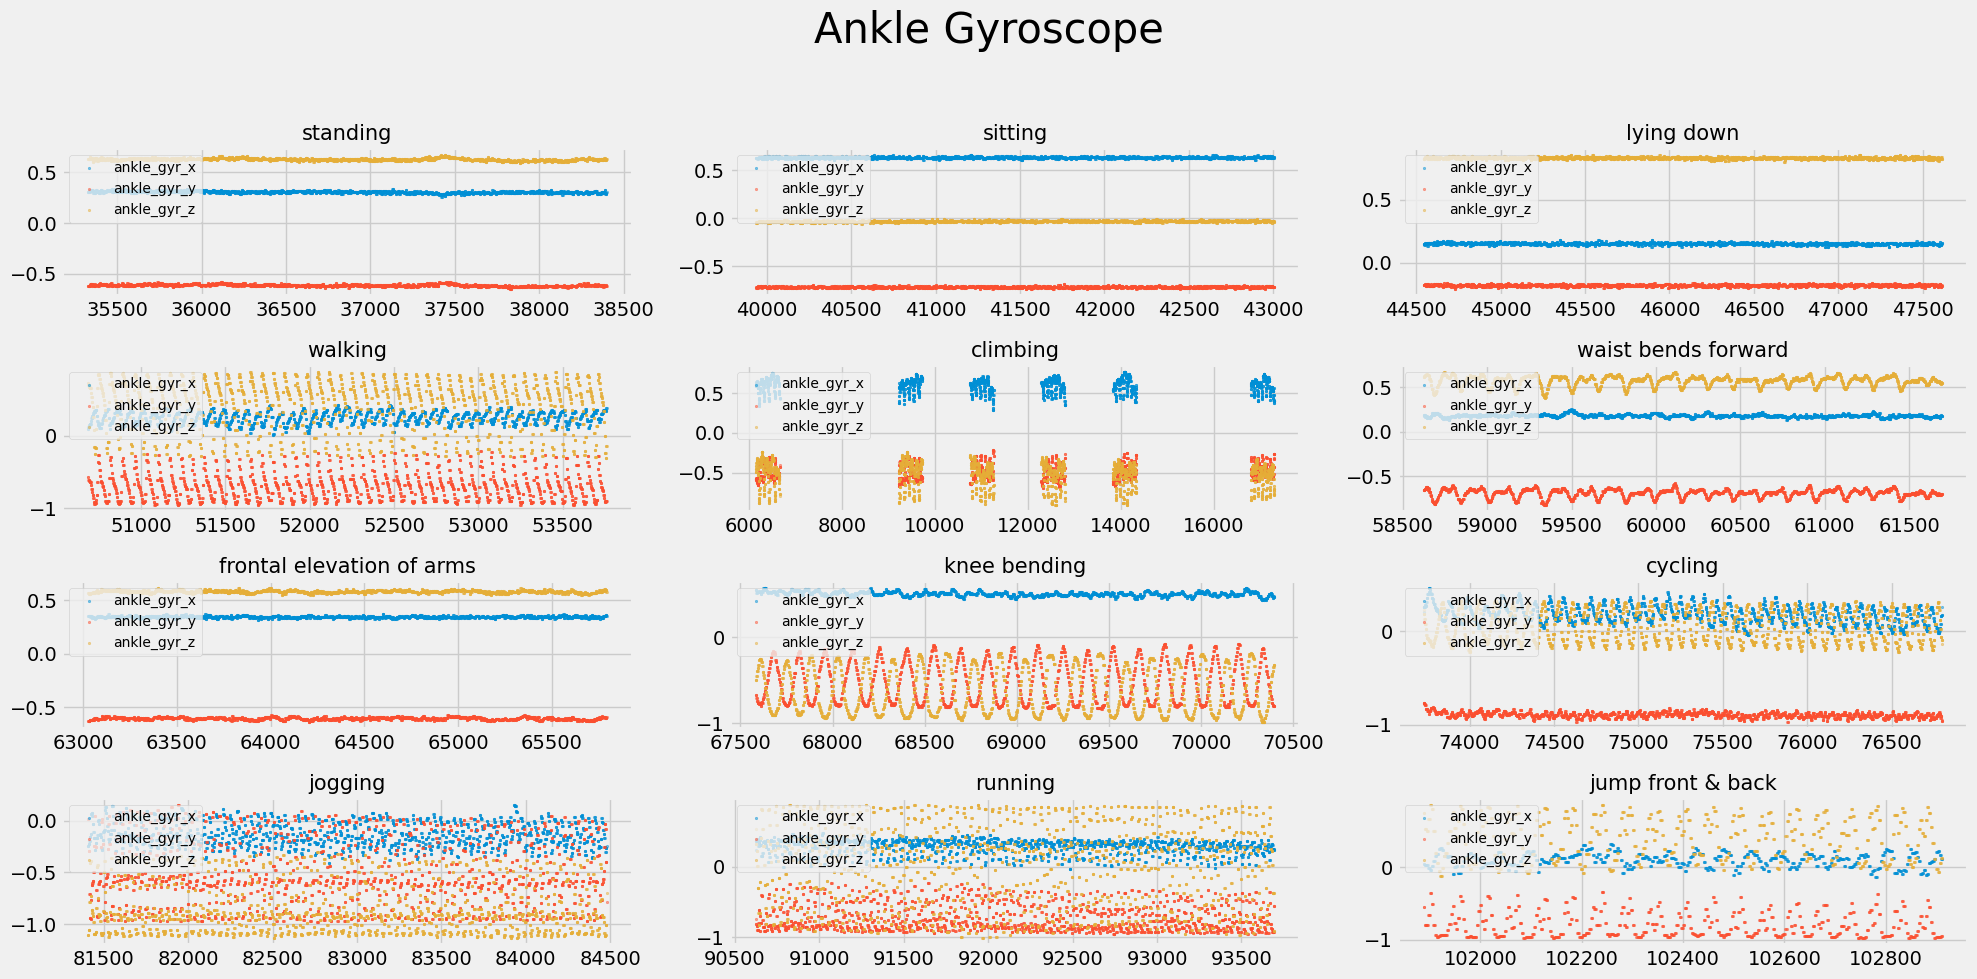

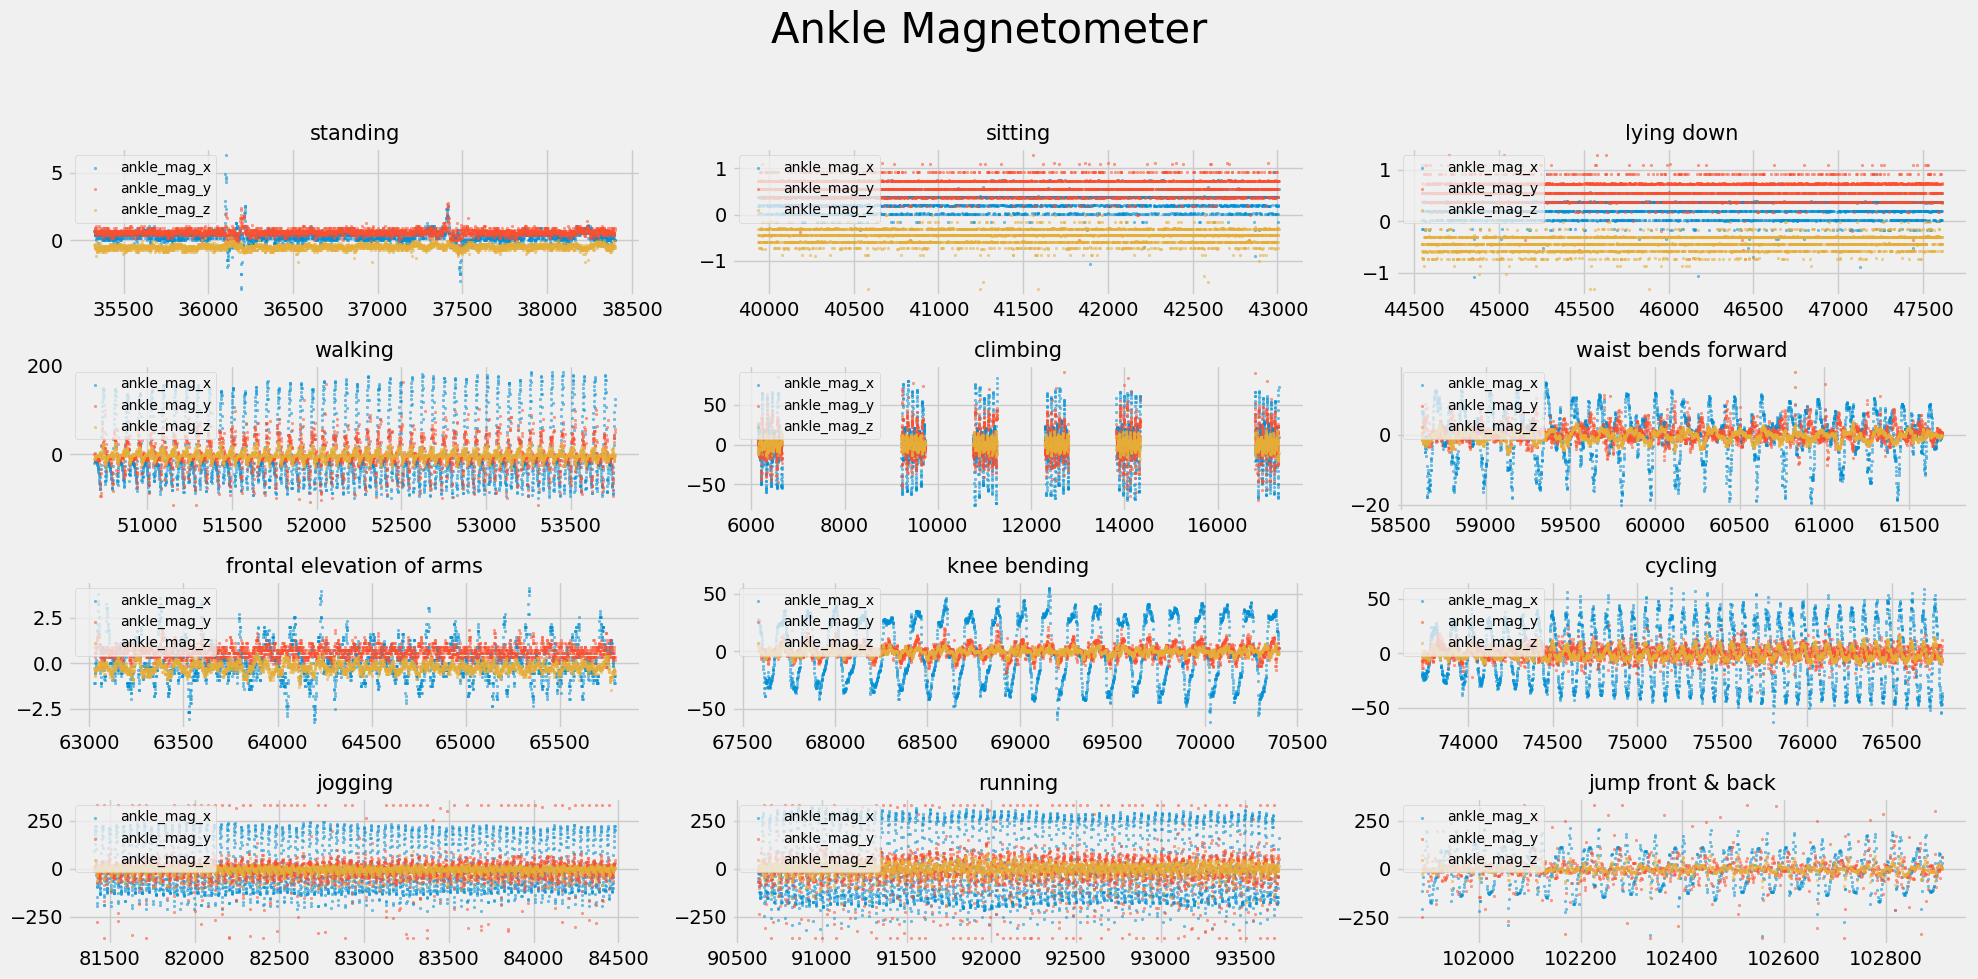

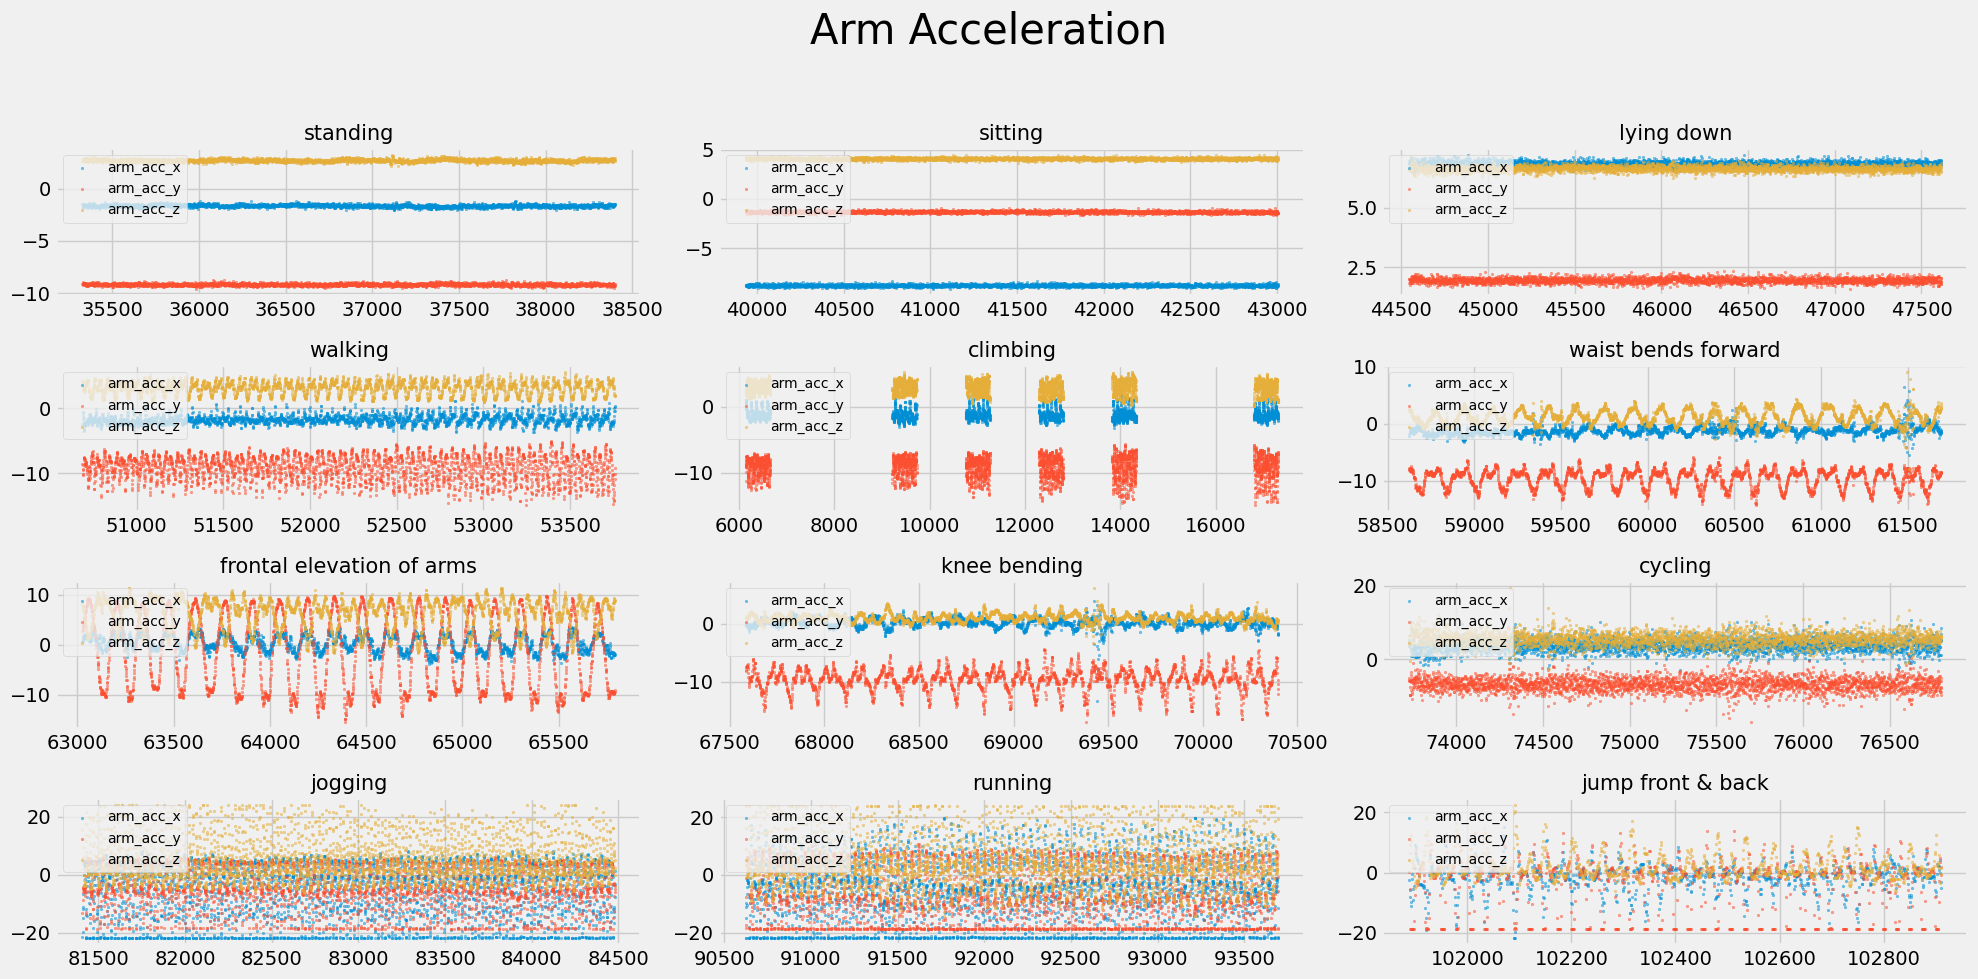

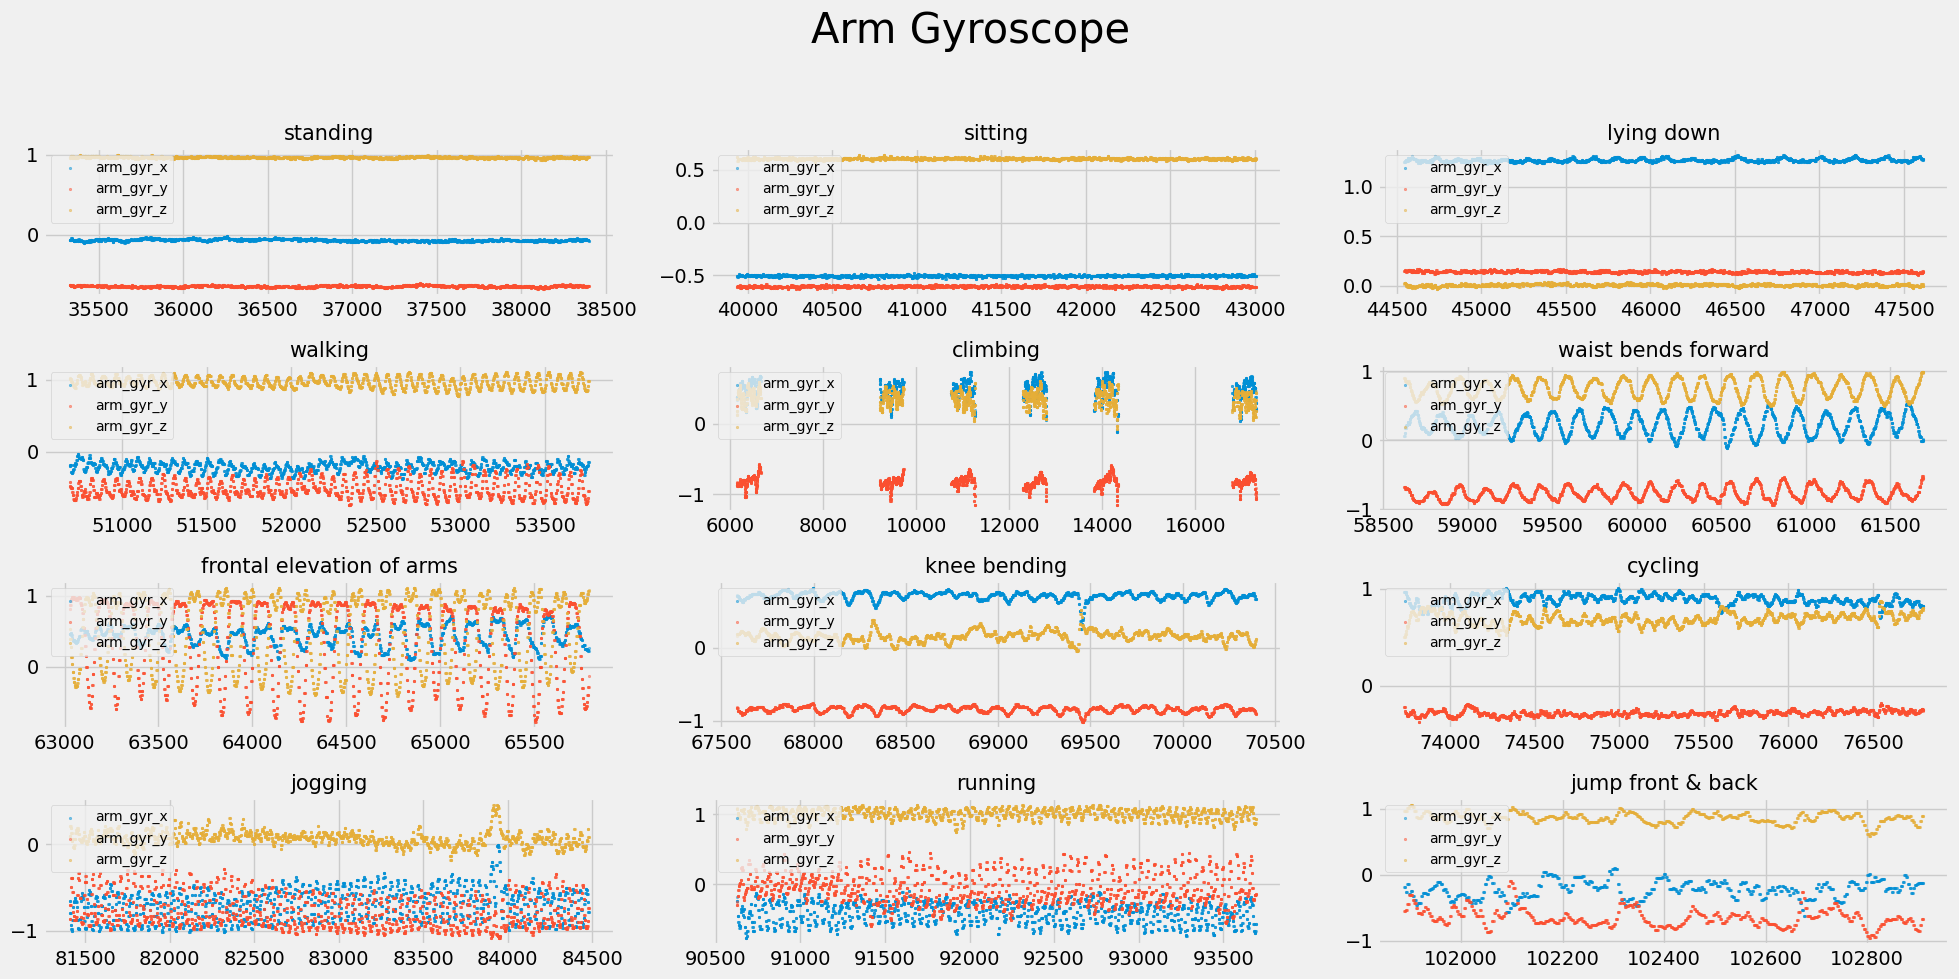

In [32]:
for i in range(1,7):
    activity_plot(category[i])

##### Key Insights

Static Activities (Standing, Sitting, Lying Down):

- Observation: These activities show minimal fluctuation across all sensors and body parts, with mostly flat lines in acceleration, gyroscope, and magnetometer data.
- Insight: These flat, stable signals serve as a baseline for static positions and help in distinguishing them from dynamic activities. The minimal variability indicates little to no movement or orientation change.

Dynamic Activities (Walking, Jogging, Running):

- Observation: These activities exhibit periodic patterns, with frequency and amplitude increasing from walking to running. The accelerometer and gyroscope signals show cyclical patterns corresponding to steps, while the magnetometer shows orientation shifts.
- Insight: The periodicity and amplitude differences across these activities reflect the pace and intensity of movement. Walking has a slower, more rhythmic cycle, while running shows higher frequency and intensity.

Repetitive Upper Body Activities (Frontal Elevation of Arms, Waist Bends):

- Observation: Clear oscillatory patterns appear in arm sensors, especially in the gyroscope and magnetometer, reflecting repetitive arm or waist movement. The chest sensor also shows some oscillation for waist bends.
- Insight: Repetitive movement patterns are captured as regular peaks, which are more prominent in upper body sensors during arm movements and bending. These patterns help distinguish arm-centric activities from leg-centric activities.

Lower Body Repetitive Activity (Knee Bending):

- Observation: Knee bending shows rhythmic, cyclical patterns in both the accelerometer and gyroscope data, especially in ankle sensors, indicating consistent up-and-down leg motion.
- Insight: The distinct oscillations from knee bending reflect repetitive flexion and extension movements, useful for capturing controlled lower-body motions.

High-Impact Activities (Jumping, Climbing):

- Observation: Jumping and climbing show sharp peaks and bursts in acceleration and gyroscope data, especially at the ankle and chest sensors.
- Insight: High-impact activities generate distinct peaks due to sudden acceleration and deceleration forces during jumps and steps. These peaks indicate significant energy expenditure and impact.

### Feature Engineering

##### Low Pass Flter

In [33]:
df_lowpass = df.copy()

# Lowpass Filter Design
fs = 50
cutoff = 5  # Cutoff frequency in Hz (only frequencies below 5 Hz will pass)
order = 4  # Filter order
nyquist = 0.5 * fs  # Nyquist frequency
normal_cutoff = cutoff / nyquist

b, a = butter(order, normal_cutoff, btype='low', analog=False)
for col in df_lowpass.columns[0:-2]:
    df_lowpass[col] = filtfilt(b, a, df_lowpass[col])
    
df_lowpass.head()

chest_acc_x  chest_acc_y  chest_acc_z     ecg_1     ecg_2  ankle_acc_x  \
6144    -8.637238    -1.026827    -3.713787  0.226441  0.197016     1.196944   
6145    -8.702783    -0.931605    -3.687576  0.160711  0.165710     1.100858   
6146    -8.761212    -0.868943    -3.643408  0.085948  0.124223     1.030707   
6147    -8.801368    -0.859486    -3.568619  0.005015  0.071591     1.011927   
6148    -8.807500    -0.906567    -3.458443 -0.066192  0.017709     1.068414   

      ankle_acc_y  ankle_acc_z  ankle_gyr_x  ankle_gyr_y  ...  arm_acc_y  \
6144    -9.457154    -2.821027     0.586288    -0.583483  ... -11.251132   
6145    -9.746323    -2.849936     0.589919    -0.582847  ... -10.367900   
6146    -9.984506    -2.866335     0.593129    -0.582739  ...  -9.609919   
6147   -10.133693    -2.856480     0.595752    -0.583441  ...  -9.066130   
6148   -10.176098    -2.808406     0.597999    -0.584842  ...  -8.765251   

      arm_acc_z  arm_gyr_x  arm_gyr_y  arm_gyr_z  arm_mag_x  arm_mag_y  \
6144   4.020965   0.337180  -0.829622   0.144353  -5.296548 -10.496766   
6145   3.566281   0.351931  -0.836007   0.141971   0.479225  -3.199764   
6146   3.139681   0.364810  -0.842480   0.141857   5.945466   3.861524   
6147   2.764351   0.374542  -0.849049   0.145712  10.812668  10.427627   
6148   2.454892   0.380745  -0.855580   0.154391  14.827855  16.208157   

      arm_mag_z  activity  set  
6144 -20.200739  climbing    0  
6145 -12.315843  climbing    0  
6146  -5.475115  climbing    0  
6147  -0.426655  climbing    0  
6148   2.568231  climbing    0  

[5 rows x 25 columns]

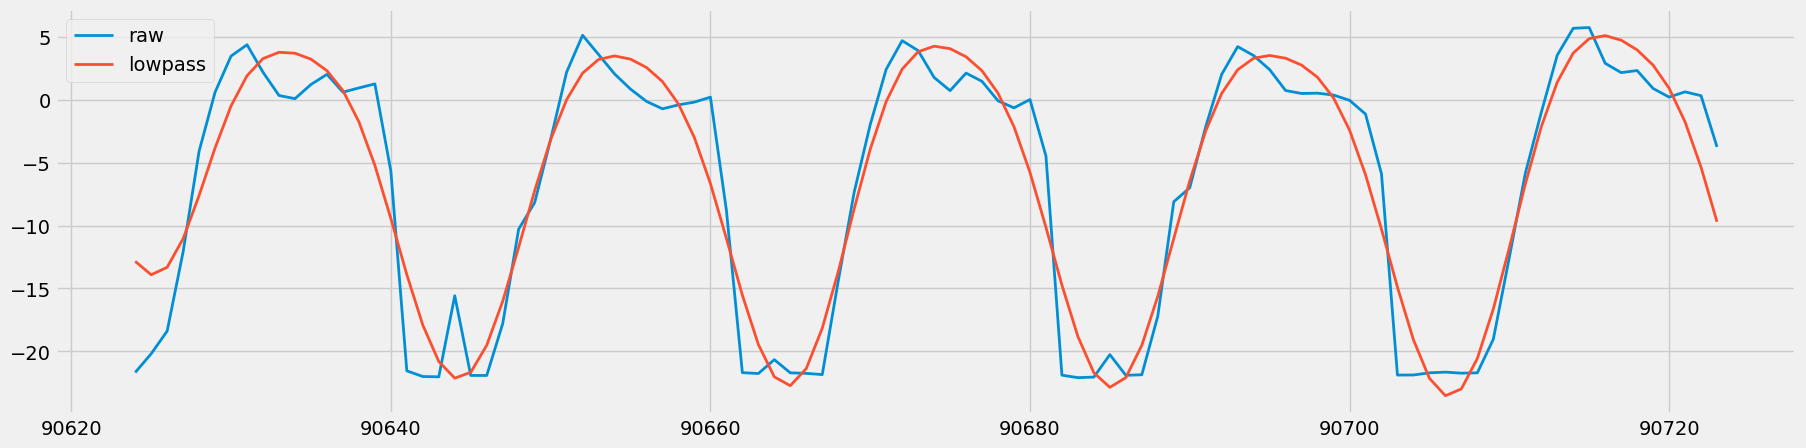

In [34]:
test = df.loc[(df["activity"] == "running") & (df["set"] == 0),"chest_acc_x"][0:100]
test_lowpass = df_lowpass.loc[(df_lowpass["activity"] == "running") & (df_lowpass["set"] == 0),"chest_acc_x"][0:100]

plt.figure()
plt.plot(test, label = "raw")
plt.plot(test_lowpass ,label = "lowpass")
plt.legend()
plt.show()

We can see that the plot lowpass filter is applied and is changed smoothly. It removes a noise.